# *Deforestation Detection using Deep Learning*


Import packages

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
dir0 = '/content/drive/MyDrive/unet_model/dataset/train/images'
dir1 = '/content/drive/MyDrive/unet_model/dataset/train/masks'

Create dataframe for training, validation and testing datasets

In [4]:
# files=[]
# paths = []
# for dirname, _, filenames in os.walk(dir0):
#     for filename in filenames:
#         path = os.path.join(dirname, filename)    
#         paths.append(path)
#         files.append(filename)

files = []
image_path = []
for dirname, _, filenames in os.walk(dir0):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        image_path.append(path)
        
        file = filename.split(".")[0]
        files.append(file)

d = {"id": files, "image_path": image_path}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

image_path
id                                                                   
deforestation_4706  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_471   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_4711  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_4703  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_4708  /content/drive/MyDrive/unet_model/dataset/trai...
...                                                               ...
deforestation_1102  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_11    /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1108  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1111  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1113  /content/drive/MyDrive/unet_model/dataset/trai...

[5122 rows x 1 columns]

In [5]:
# mfiles=[]
# mpaths = []
# for dirname, _, filenames in os.walk(dir1):
#     for filename in filenames:
#         path = os.path.join(dirname, filename)    
#         mpaths.append(path)
#         mfiles.append(filename)

mfiles = []
mask_path = []
for dirname, _, filenames in os.walk(dir1):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        mfile = filename.split(".")[0]
       # car_id = car_id.split("_mask")[0]
        mfiles.append(mfile)

        
d = {"id": mfiles,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

mask_path
id                                                                   
deforestation_998   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_982   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_983   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_985   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_977   /content/drive/MyDrive/unet_model/dataset/trai...
...                                                               ...
deforestation_113   /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1092  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1113  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_1064  /content/drive/MyDrive/unet_model/dataset/trai...
deforestation_111   /content/drive/MyDrive/unet_model/dataset/trai...

[5122 rows x 1 columns]

Lets look at our images and masks

(256, 256)


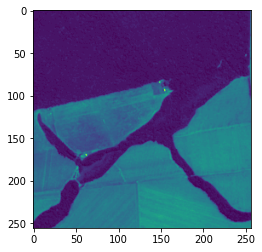

(256, 256)


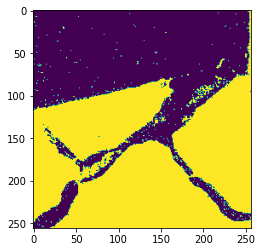

In [6]:
import cv2
path0='/content/drive/MyDrive/unet_model/dataset/train/images/deforestation_2121.png'
img0=cv2.imread(path0,cv2.IMREAD_GRAYSCALE)
shape0=img0.shape
print(shape0)
plt.imshow(img0)
plt.show()

path1='/content/drive/MyDrive/unet_model/dataset/train/masks/deforestation_2121.png'
img1=cv2.imread(path1,cv2.IMREAD_GRAYSCALE)
shape1=img1.shape
print(shape1)
plt.imshow(img1)
plt.show()

In [7]:
# df0=pd.DataFrame(columns=['file','path','mpath','class'])
# df0['file']=files
# df0['path']=paths
# df0['mpath']=mpaths
# df0['class']=1

# display(df0)
# df0.sample(frac=1)

df["mask_path"] = mask_df["mask_path"]
df

image_path  \
id                                                                      
deforestation_4706  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_471   /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4711  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4703  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4708  /content/drive/MyDrive/unet_model/dataset/trai...   
...                                                               ...   
deforestation_1102  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_11    /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_1108  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_1111  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_1113  /content/drive/MyDrive/unet_model/dataset/trai...   

                                                            mask_path  
id                                                                     
deforestation_4706  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_471   /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_4711  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_4703  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_4708  /content/drive/MyDrive/unet_model/dataset/trai...  
...                                                               ...  
deforestation_1102  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_11    /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_1108  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_1111  /content/drive/MyDrive/unet_model/dataset/trai...  
deforestation_1113  /content/drive/MyDrive/unet_model/dataset/trai...  

[5122 rows x 2 columns]

In [8]:
n = len(df)
print(n)
test_df = df.iloc[(n//10)*3:(n//10)*4]
print(test_df)

5122
                                                           image_path  \
id                                                                      
deforestation_429   /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4291  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4299  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_43    /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_4295  /content/drive/MyDrive/unet_model/dataset/trai...   
...                                                               ...   
deforestation_2947  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_2938  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_2952  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_2954  /content/drive/MyDrive/unet_model/dataset/trai...   
deforestation_2960  /content/drive/MyDrive/unet_model/dataset/trai...   

                                             

**Preprocess data**

We apply data augmentations and process our dataset

In [9]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):
    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(image_path, mask_path):
    car_img = tf.io.read_file(image_path) 
    car_img = tf.image.decode_png(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_png(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

In [10]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)
test = create_dataset(test_df)

In [11]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [12]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [13]:
def display(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input Image','True Mask','Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

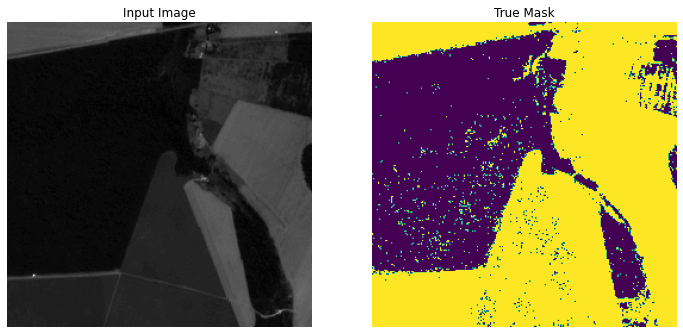

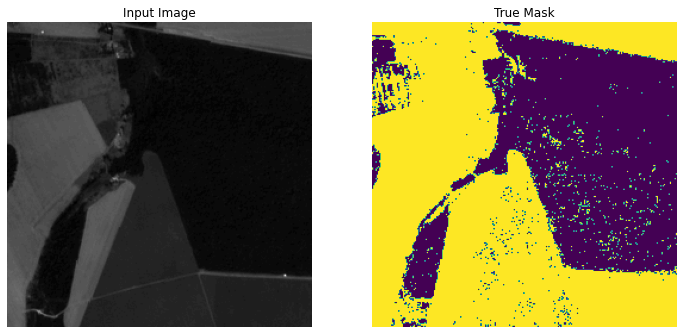

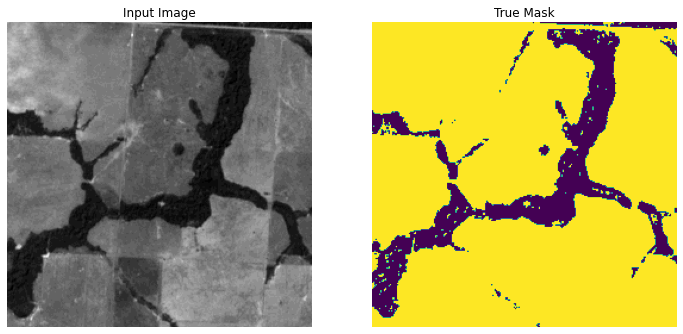

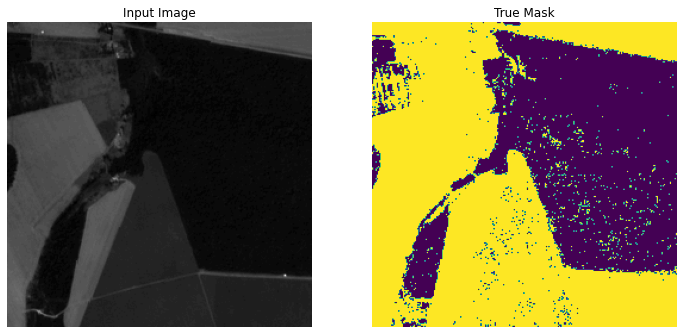

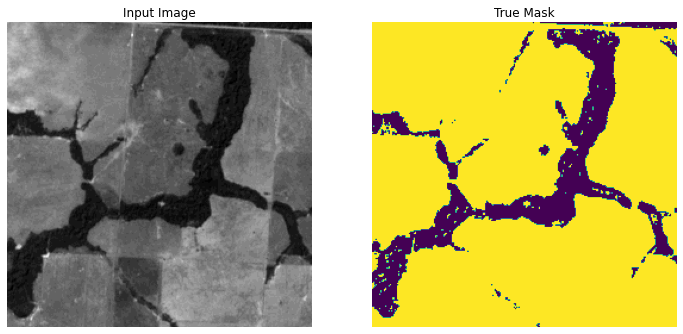

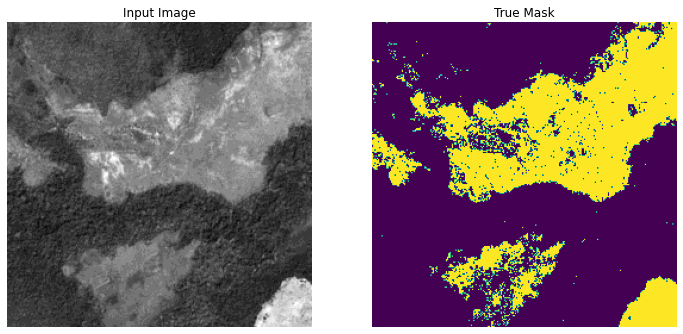

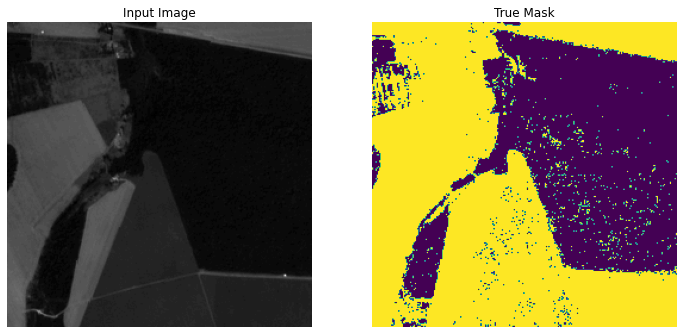

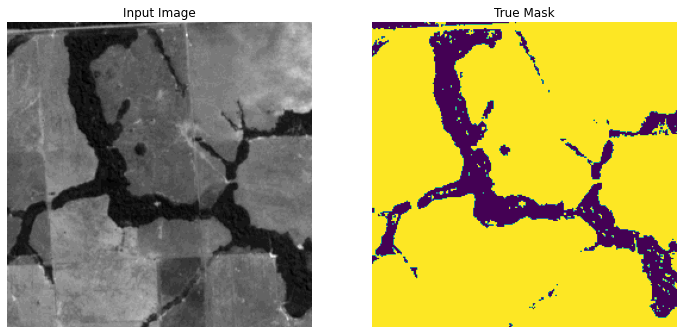

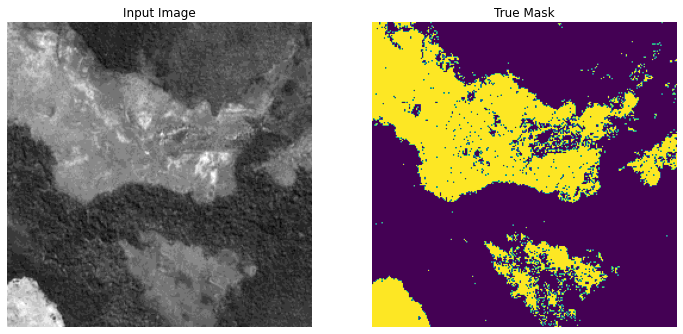

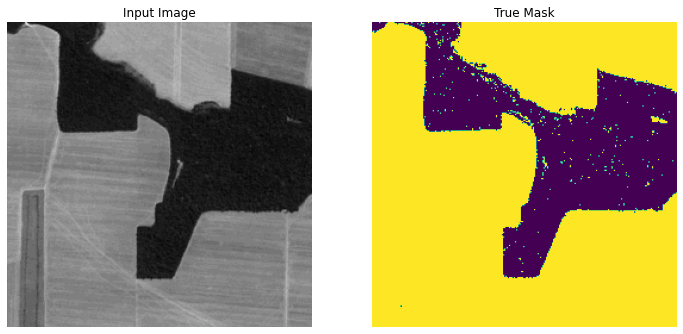

In [14]:
for i in range(5):
    for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

**Model**

We are going to use U-Net model. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder.The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications.

In [41]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = True 

In [42]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [43]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

**Train the model**

Now let's compile the model and see the model architecture

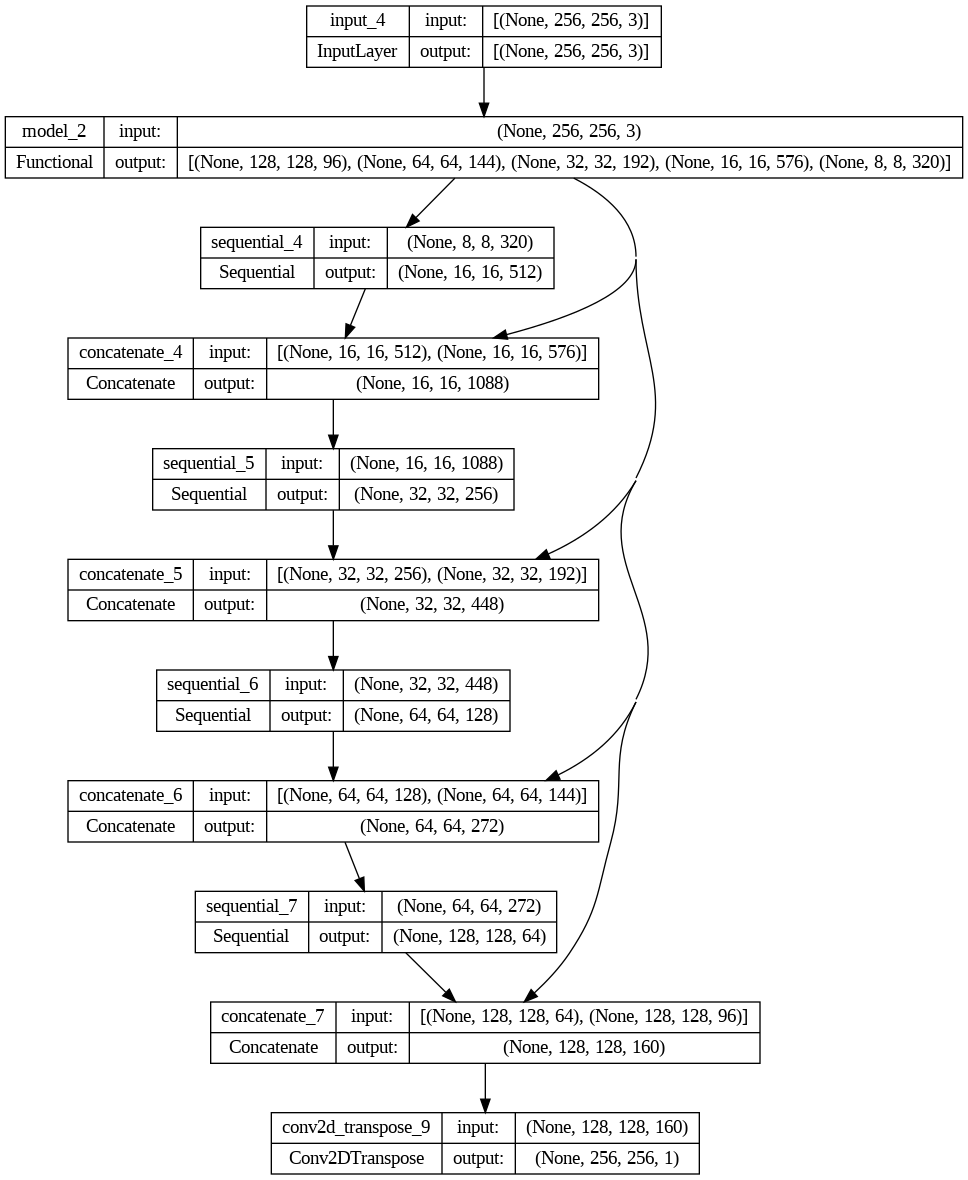

In [44]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Lets do some prediction before training

In [45]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           [(None, 128, 128, 9  1841984     ['input_4[0][0]']                
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                         

In [46]:
def visualize(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])

1/1 [==============================] - 1s 769ms/step


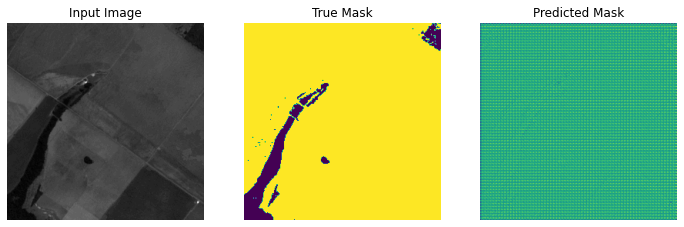

1/1 [==============================] - 0s 20ms/step


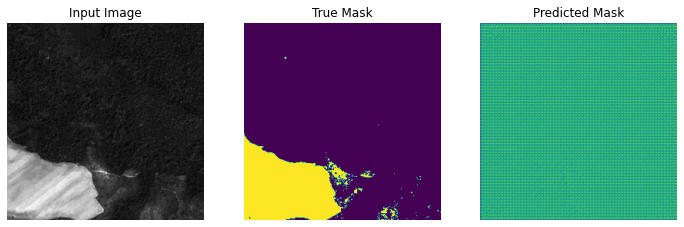

1/1 [==============================] - 0s 19ms/step


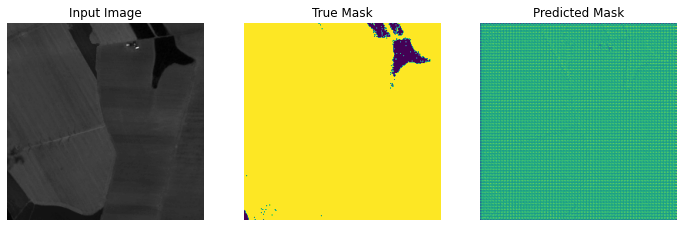

1/1 [==============================] - 0s 20ms/step


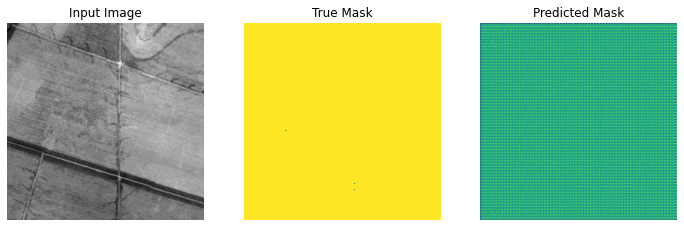

1/1 [==============================] - 0s 20ms/step


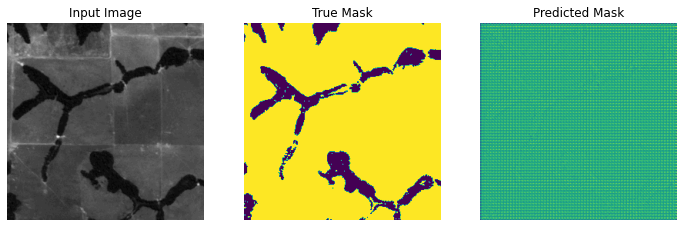

1/1 [==============================] - 0s 19ms/step


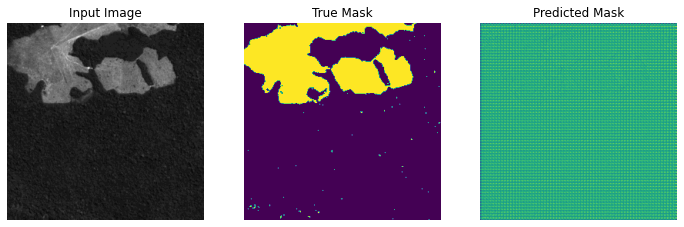

1/1 [==============================] - 0s 22ms/step


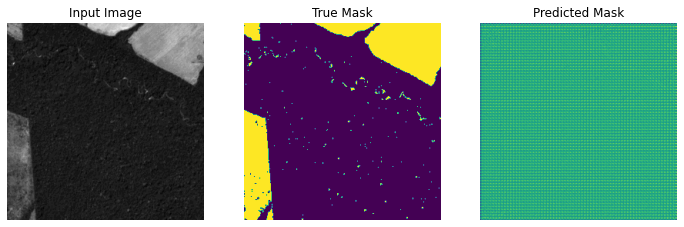

1/1 [==============================] - 0s 20ms/step


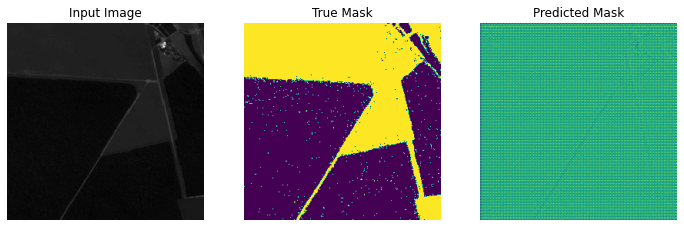

1/1 [==============================] - 0s 20ms/step


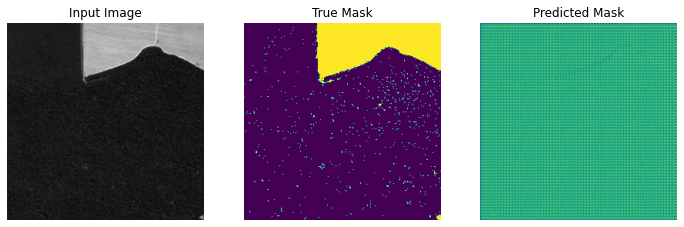

1/1 [==============================] - 0s 26ms/step


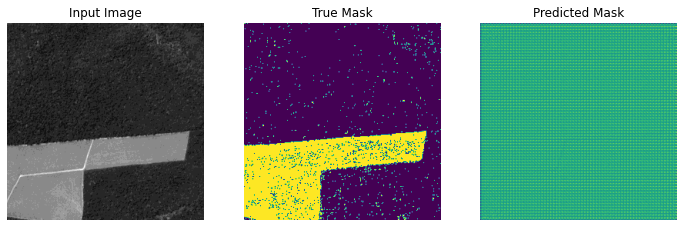

In [47]:
for i in range(5):
    for images, masks in train_dataset.take(i):
        for img, mask in zip(images, masks):
            sample_image = img
            sample_mask = mask
            show_predictions(sample_image, sample_mask)
            break

Epoch 1/40
  6/240 [..............................] - ETA: 51s - loss: 0.3928 - dice_coef: 0.6072 - binary_accuracy: 0.6377

240/240 [==============================] - 70s 271ms/step - loss: 0.1092 - dice_coef: 0.8908 - binary_accuracy: 0.9491 - val_loss: 0.3590 - val_dice_coef: 0.6414 - val_binary_accuracy: 0.5464
Epoch 2/40
1/1 [==============================] - 0s 20ms/step


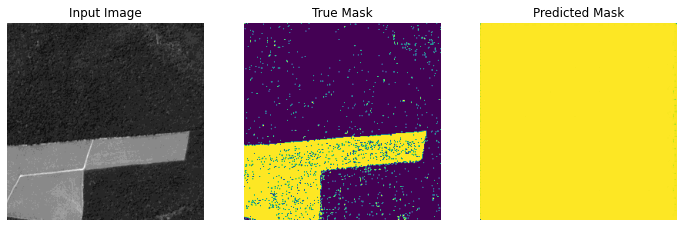

Epoch 3/40
240/240 [==============================] - 64s 268ms/step - loss: 0.0649 - dice_coef: 0.9352 - binary_accuracy: 0.9738 - val_loss: 0.3430 - val_dice_coef: 0.6572 - val_binary_accuracy: 0.5533
Epoch 4/40
240/240 [==============================] - 61s 255ms/step - loss: 0.0623 - dice_coef: 0.9378 - binary_accuracy: 0.9745 - val_loss: 0.4009 - val_dice_coef: 0.5996 - val_binary_accuracy: 0.5625
Epoch 5/40
1/1 [==============================] - 0s 19ms/step


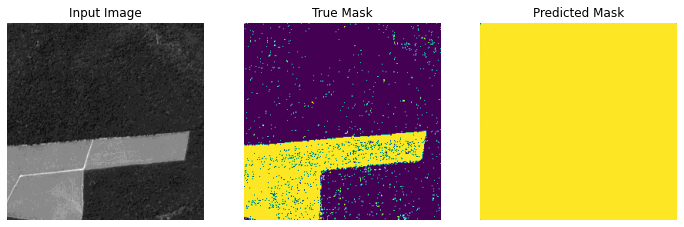

Epoch 6/40
240/240 [==============================] - 64s 268ms/step - loss: 0.0595 - dice_coef: 0.9406 - binary_accuracy: 0.9752 - val_loss: 0.3430 - val_dice_coef: 0.6572 - val_binary_accuracy: 0.5533
Epoch 7/40
240/240 [==============================] - 61s 256ms/step - loss: 0.0588 - dice_coef: 0.9411 - binary_accuracy: 0.9744 - val_loss: 0.3430 - val_dice_coef: 0.6572 - val_binary_accuracy: 0.5533
Epoch 8/40
1/1 [==============================] - 0s 19ms/step


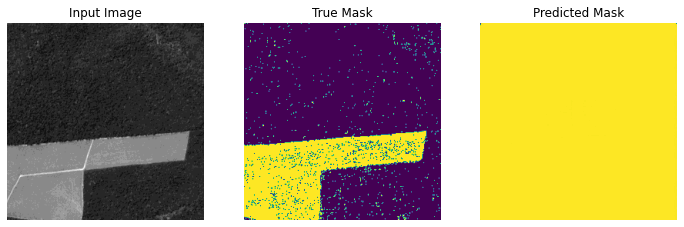

Epoch 9/40
240/240 [==============================] - 61s 256ms/step - loss: 0.0548 - dice_coef: 0.9448 - binary_accuracy: 0.9765 - val_loss: 0.1322 - val_dice_coef: 0.8692 - val_binary_accuracy: 0.9340
Epoch 10/40
240/240 [==============================] - 64s 267ms/step - loss: 0.0531 - dice_coef: 0.9470 - binary_accuracy: 0.9768 - val_loss: 0.2048 - val_dice_coef: 0.7970 - val_binary_accuracy: 0.8518
Epoch 11/40
1/1 [==============================] - 0s 19ms/step


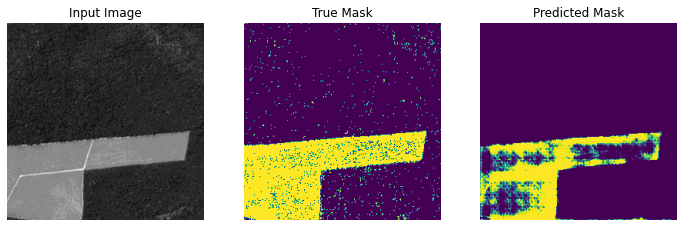

Epoch 12/40
240/240 [==============================] - 64s 268ms/step - loss: 0.0526 - dice_coef: 0.9471 - binary_accuracy: 0.9765 - val_loss: 0.1227 - val_dice_coef: 0.8787 - val_binary_accuracy: 0.9432
Epoch 13/40
240/240 [==============================] - 61s 256ms/step - loss: 0.0515 - dice_coef: 0.9487 - binary_accuracy: 0.9773 - val_loss: 0.0993 - val_dice_coef: 0.9018 - val_binary_accuracy: 0.9610
Epoch 14/40
1/1 [==============================] - 0s 20ms/step


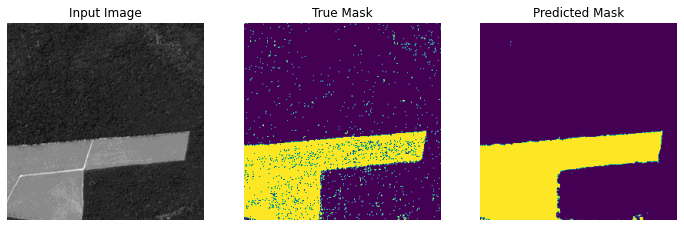

Epoch 15/40
240/240 [==============================] - 65s 269ms/step - loss: 0.0504 - dice_coef: 0.9493 - binary_accuracy: 0.9778 - val_loss: 0.0927 - val_dice_coef: 0.9083 - val_binary_accuracy: 0.9605
Epoch 16/40
240/240 [==============================] - 62s 256ms/step - loss: 0.0522 - dice_coef: 0.9479 - binary_accuracy: 0.9775 - val_loss: 0.1932 - val_dice_coef: 0.8087 - val_binary_accuracy: 0.8637
Epoch 17/40
1/1 [==============================] - 0s 20ms/step


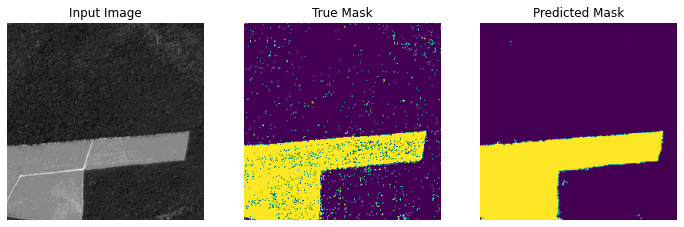

Epoch 18/40
240/240 [==============================] - 65s 271ms/step - loss: 0.0499 - dice_coef: 0.9502 - binary_accuracy: 0.9780 - val_loss: 0.1142 - val_dice_coef: 0.8870 - val_binary_accuracy: 0.9311


In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 40
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

**Testing**

We test the trained model on our test dataset

In [49]:
for i in range(8):
    for images, masks in test_dataset.take(i):
        for img, mask in zip(images, masks):
            tsample_image = img
            tsample_mask = mask
            show_predictions(tsample_image, tsample_mask)
            break

Output hidden; open in https://colab.research.google.com to view.

**Evaluation**



In [50]:
def plot_accuracy_loss(model_history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(model_history.history['binary_accuracy'],'bo--', label = "acc")
    plt.plot(model_history.history['val_binary_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(model_history.history['loss'],'bo--', label = "loss")
    plt.plot(model_history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
plot_accuracy_loss(model_history)

**Acknowledgements**

https://www.kaggle.com/code/dikshabhati2002/image-segmentation-u-net/notebook